<a href="https://colab.research.google.com/github/MaitreyeeBudhale/Machine-Learning-Models-from-scratch/blob/main/Salary_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
abhishek14398_salary_dataset_simple_linear_regression_path = kagglehub.dataset_download('abhishek14398/salary-dataset-simple-linear-regression')

print('Data source import complete.')


Data source import complete.


# Import Libraries
* numpy for array manipulation
* pandas for loading data
* train_test_split for splitting training and testpandas for data loading
* matplotlib for plotting graph
  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data

In [4]:
df=pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

# Deal with unwanted columns

the dataset contains column called 'Unnamed: 0' we don't need that hence drop the column

In [5]:
df.columns
df.drop(columns=['Unnamed: 0'],axis=1)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


# Initial scatter plot
plot the values to understand dataset clearly

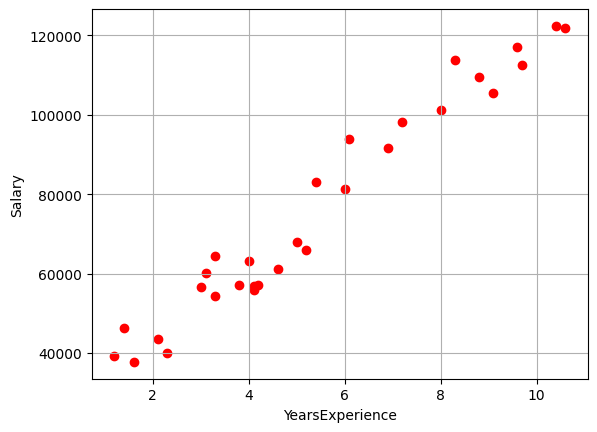

In [6]:
X=df['YearsExperience'].values.reshape(-1,1)#converting 1 d array to 2d array
y=df['Salary']
plt.scatter(X,y,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Split Training and Testing Data

We will split the data into two categories: training and testing. We will use training data to train the model


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Define LinearRegression Class
![gd.png](attachment:f24e0eb5-6c2c-4b37-9d45-f607ef180ad2.png)

In [8]:
class LinearRegression:
    # constructor
    # default learning rate is 0.01
    # default iterations are 1000
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self,X,y):
      n_samples,n_features=X.shape
      self.weights=np.random.rand(n_features) #weight is initialized to random number
      self.bias = 0 # bias initilized to 0

      for i in range(self.n_iters):

            # y_pred shape should be N, 1
            # predicting value such that y = m*X + b
            y_pred = np.dot(X, self.weights) + self.bias

            # gradient of the cost function with respect to the weights
            dw = (1 / n_samples) * np.dot(X.T, y_pred - y)

            # gradient of the cost function with respect to the bias
            db = (1 / n_samples) * np.sum(y_pred - y)

            # decrease the weight by error cost
            # lr make sure that we take smaller steps
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr*db

      return self

    def predict(self,X):
       # predicting value such that y = m*X + b
      return np.dot(X,self.weights)+self.bias

# Define r2_score function
This function will help us to understand how well fitted our model is
![r2_score.png](attachment:28fb0969-88cc-45b3-8fd3-55f433608201.png)

This is the formula for calculating r2_score

In [9]:
def r2_score(y_original,y_pred):

    y_original=np.array(y_original)
    y_pred=np.array(y_pred)

    ss_res=np.sum((y_original-y_pred)**2)
    ss_tot=np.sum((y_original-np.mean(y_pred))**2)

    r2=1-(ss_res/ss_tot)

    return r2

# Train the model

We will train model using X_train and y_train

In [10]:
ml=LinearRegression()#create object for linear regression class
ml.fit(X_train,y_train)

# Predict values using testing data

This is done to understand how model behaves when encountered with unseen data

In [11]:
y_pred=ml.predict(X_test)

# Calculate r2_score
Compare predicted value with original value to understand the difference between them

In [12]:
r2_score(y_test,y_pred)

np.float64(0.9788060226897018)

The model has r2_score of 0.9788.
This means our model is 97.88% accurate which is good

# Plot the graph to see line of beset fit

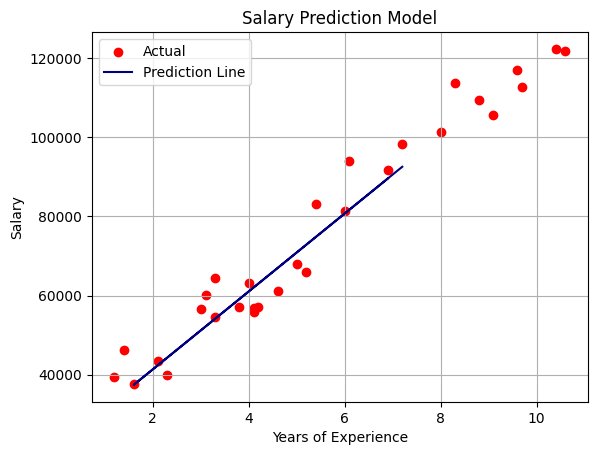

In [13]:
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X_test, y_pred, color='navy', label='Prediction Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction Model')
plt.legend()
plt.grid(True)
plt.show()

# Use the model for predcition

In [14]:
experiance=float(input('Enter Experiance in years: '))
salary=ml.predict(experiance)
print(f'Predicted Salary: {salary[0]:.2f} Rs')

Enter Experiance in years: 23
Predicted Salary: 248310.81 Rs
